# import libraries

In [3]:
import pandas as pd
import numpy as np
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [4]:
#mounding google drive
#from google.colab import drive
#drive.mount('/content/drive')

# load dataset

In [5]:
pd.set_option("display.max_columns",None)
df=pd.read_excel("Copper_Set.xlsx")
#df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Copper_Set.xlsx")
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [6]:
df1=df.copy()

In [7]:
df1.shape

(181673, 14)

#checking null values

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [9]:
df1.isnull().sum().sort_values(ascending=False)

material_ref     77919
country             28
application         24
id                   2
status               2
item_date            1
customer             1
thickness            1
delivery date        1
selling_price        1
quantity tons        0
item type            0
width                0
product_ref          0
dtype: int64

In [10]:
df.duplicated().sum()

0

### in material ref near 50% data are missing so drop the column

In [11]:
df1.drop(["material_ref","id"],axis=1,inplace=True)

## missing values for other columns are minimum so drop the rows

In [12]:
df1.dropna(inplace=True)

In [13]:
df1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price'],
      dtype='object')

# feature engineering and EDA

In [14]:
df1["item_date"]=pd.to_datetime(df1["item_date"],format="%Y%m%d",errors="coerce").dt.date
df1["delivery date"]=pd.to_datetime(df1["delivery date"],format="%Y%m%d",errors="coerce").dt.date

In [15]:
df1.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1668701718,2021-04-01,1047.0


In [16]:
def numerics(x):
  try:
    return round(float(x),1)
  except:
    return np.nan

In [17]:
df1["quantity_tons"]=df1["quantity tons"].apply(lambda x: numerics(x))

In [18]:
df1["quantity tons"].value_counts()

quantity tons
54.151139      1
126.485605     1
128.450350     1
30.110968      1
50.496085      1
              ..
11.605474      1
14.503911      1
4.977580       1
1003.530017    1
406.686538     1
Name: count, Length: 181638, dtype: int64

In [19]:
df1.drop(["quantity tons"],axis=1,inplace=True)

In [20]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
customer,181638.0,3.023251e+07,1.005615e+05,12458.00,30196884.0,30205242.0,3.028042e+07,3.040818e+07
country,181638.0,4.489308e+01,2.440425e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181638.0,2.561629e+01,1.775418e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181638.0,2.564151e+00,6.572518e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181638.0,1.295263e+03,2.616425e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181638.0,4.740325e+08,7.175384e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
selling_price,181638.0,1.918328e+03,3.318267e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08
quantity_tons,181637.0,5.876038e+03,2.349308e+06,-2000.00,11.0,30.4,6.720000e+01,1.000000e+09


#### In quantity tons and selling price columns have negative values so drop the rows

In [21]:
df2=df1[df1["quantity_tons"]>0]

In [22]:
df3=df2[df2["selling_price"]>0]

In [23]:
df3.shape

(181522, 12)

In [24]:
df3["customer"]=df3["customer"].astype(str)

In [25]:
df3["customer_id"]=df3["customer"].apply(lambda x: x.split(".")[0]).astype(int)

In [26]:
df3["country"]=df3["country"].astype(str)

In [27]:
df3["country"]=df3["country"].apply(lambda x: x.split(".")[0]).astype(int)

In [28]:
df3["application"]=df3["application"].astype(str)

In [29]:
df3["application"]=df3["application"].apply(lambda x: x.split(".")[0]).astype(int)

In [30]:
df3.columns

Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'product_ref', 'delivery date',
       'selling_price', 'quantity_tons', 'customer_id'],
      dtype='object')

In [31]:
df3.status.unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [32]:
df3.status=df3.status.map({'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4,
                                 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})

In [33]:
df3["item type"].value_counts()

item type
W         105511
S          69202
PL          5647
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64

*   WI (Work-in-progress Inventory): Highest priority as they are currently in progress and need close monitoring.
*   W (Work-in-progress): Items currently being processed.
*   IPL (Initial Production Lot): New items in the production line.
*   PL (Production Line items): Standard items in production.
*   S (Standard items): Regular inventory items.
*   Other (Other items not classified): Miscellaneous items.


In [34]:
df3["item_type"]=df3["item type"].map({'WI': 1,'W': 2,'IPL': 3,'PL': 4,'S': 5,'Others':6,"SLAWR":6})

In [35]:
df3=df3.drop(["item type"],axis=1)

## removing outliers by IQR method

In [36]:
cols=['quantity_tons', 'customer_id', 'item_type', 'application', 'thickness', 'width', 'selling_price']

In [37]:
df3.dtypes

item_date         object
customer          object
country            int32
status             int64
application        int32
thickness        float64
width            float64
product_ref        int64
delivery date     object
selling_price    float64
quantity_tons    float64
customer_id        int32
item_type          int64
dtype: object

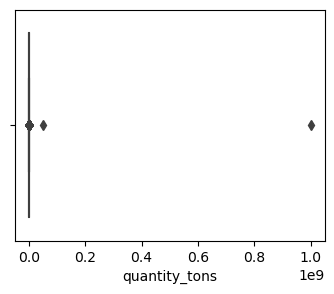

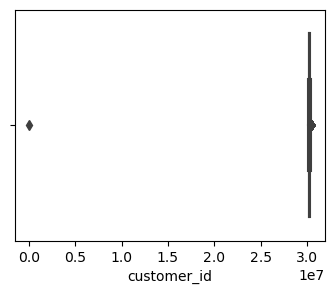

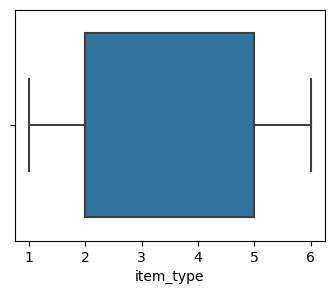

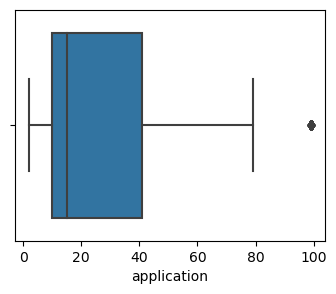

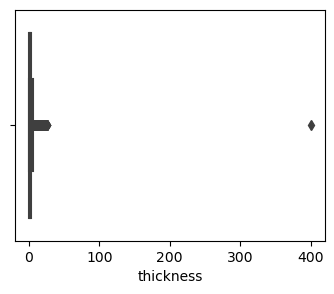

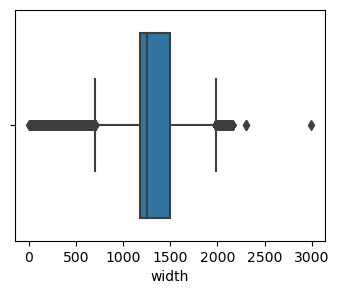

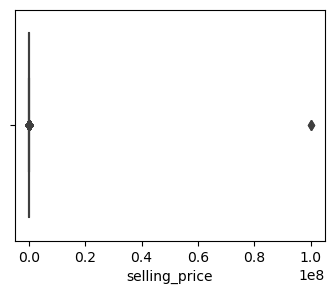

In [38]:
for column in cols:
    plt.figure(figsize=(4,3))
    sns.boxplot(x=df3[column])



In [39]:
df4=df3.copy()

### apply log transformation

In [40]:
df4['quantity_tons'] = np.log(df4['quantity_tons']+1)
df4['width'] = np.log(df4['width']+1)
df4['selling_price'] = np.log(df4['selling_price']+1)
df4.head(2)

,item_date,customer,country,status,application,thickness,width,product_ref,delivery date,selling_price,quantity_tons,customer_id,item_type
0,2021-04-01,30156308.0,28,1,10,2.0,7.313887,1670798778,2021-07-01,6.751101,4.010963,30156308,2
1,2021-04-01,30202938.0,25,1,41,0.8,7.099202,1668701718,2021-04-01,6.954639,6.645091,30202938,2


In [41]:
def outliers(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  return lower_bound,upper_bound

In [42]:
# Apply the outliers function to each numerical column
for column in cols:
    if pd.api.types.is_numeric_dtype(df4[column]):
        lower_bound, upper_bound = outliers(df4, column)
        df4 = df4[(df4[column] >= lower_bound) & (df4[column] <= upper_bound)]


In [43]:
df4.head()

,item_date,customer,country,status,application,thickness,width,product_ref,delivery date,selling_price,quantity_tons,customer_id,item_type
0,2021-04-01,30156308.0,28,1,10,2.00,7.313887,1670798778,2021-07-01,6.751101,4.010963,30156308,2
1,2021-04-01,30202938.0,25,1,41,0.80,7.099202,1668701718,2021-04-01,6.954639,6.645091,30202938,2
2,2021-04-01,30153963.0,30,1,28,0.38,6.859615,628377,2021-01-01,6.469762,5.958683,30153963,1
3,2021-04-01,30349574.0,32,1,59,2.30,7.183871,1668701718,2021-01-01,6.645091,5.315174,30349574,5
4,2021-04-01,30211560.0,28,1,10,4.00,7.601402,640665,2021-03-01,6.359574,6.667593,30211560,2


In [44]:
df4["item_date"]=pd.to_datetime(df4["item_date"])
df4["delivery date"]=pd.to_datetime(df4["delivery date"])

In [45]:
df4['date_difference'] = (df4['delivery date'] - df4['item_date']).dt.days

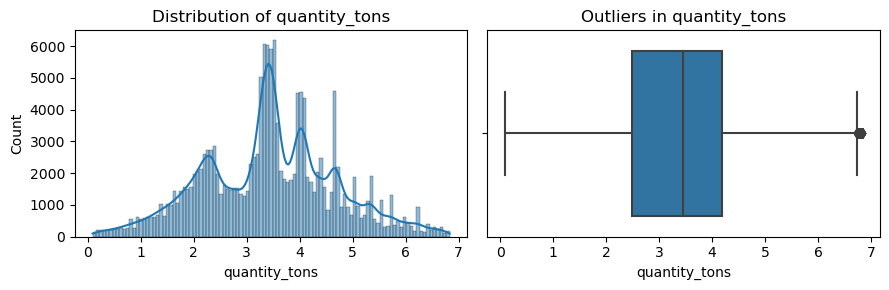

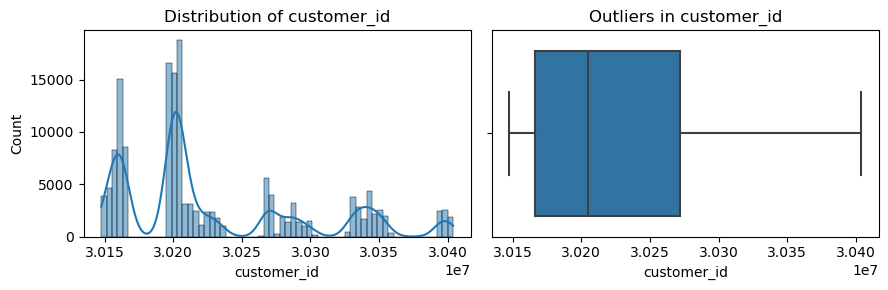

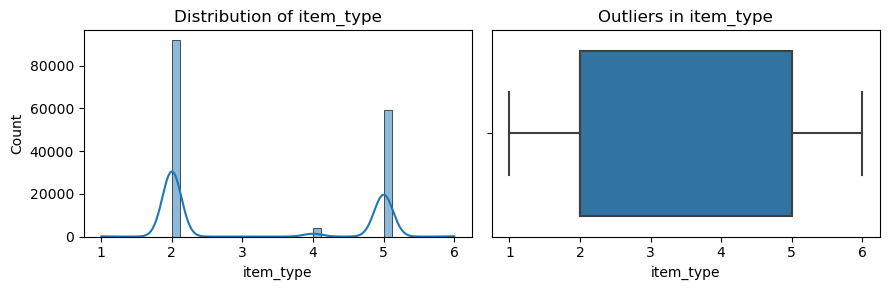

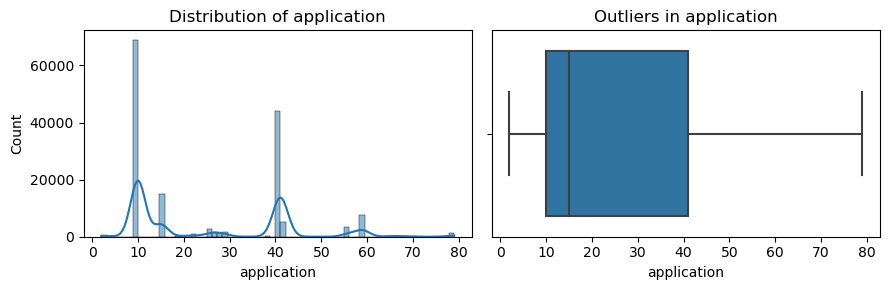

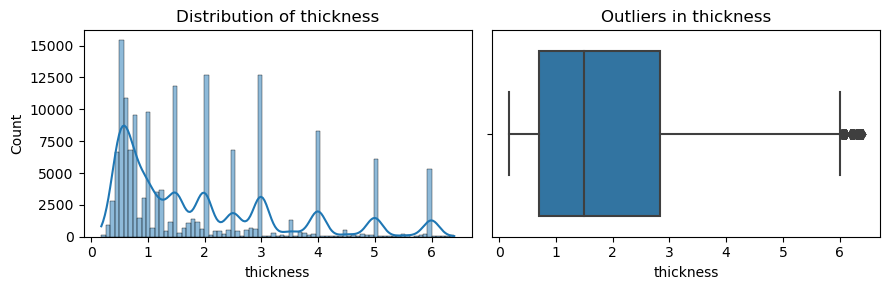

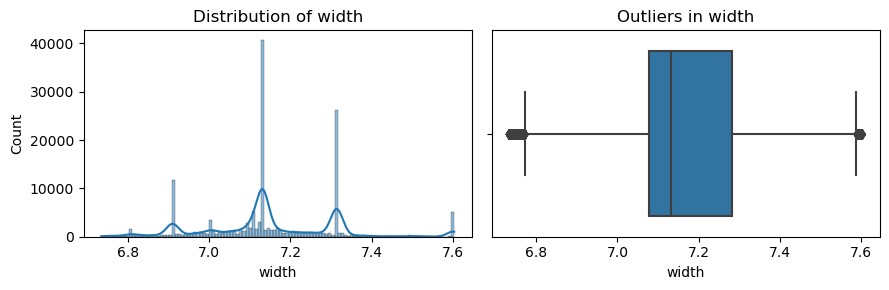

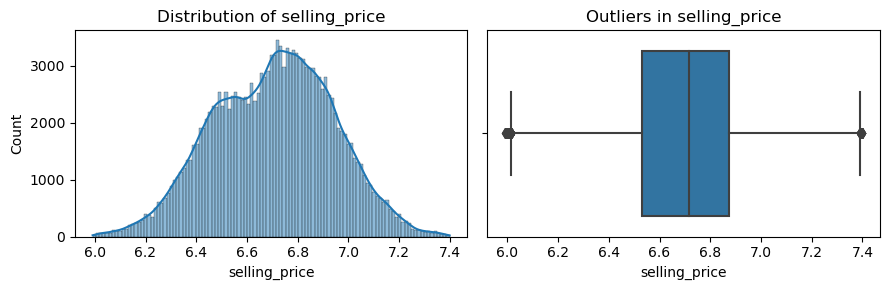

In [46]:
for column in cols:
    fig, axs = plt.subplots(1, 2, figsize=(9, 3))

    sns.histplot(df4[column], kde=True, ax=axs[0])
    axs[0].set_title(f"Distribution of {column}")

    sns.boxplot(x=df4[column], ax=axs[1])
    axs[1].set_title(f"Outliers in {column}")

    plt.tight_layout()

<Axes: xlabel='country', ylabel='status'>

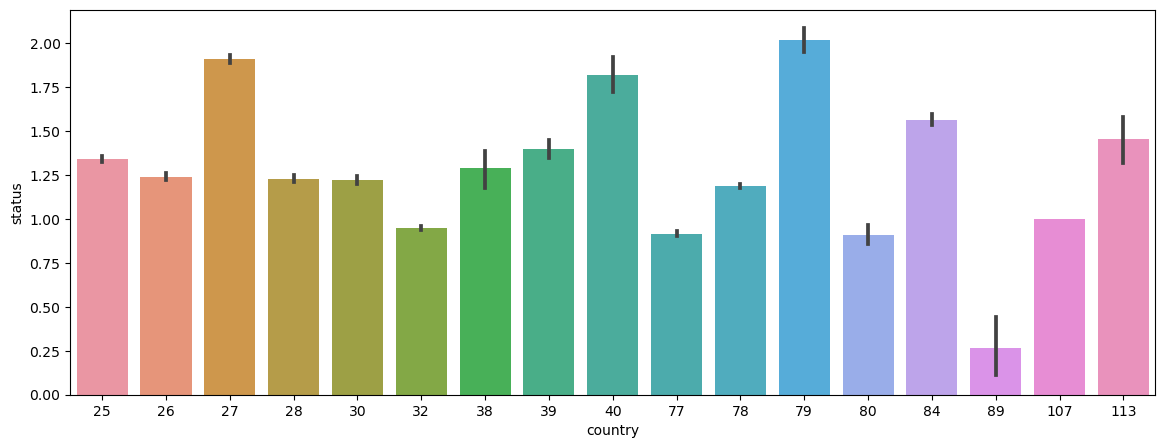

In [47]:
plt.figure(figsize=(14,5))

sns.barplot(x=df4["country"],y=df4.status)

<Axes: >

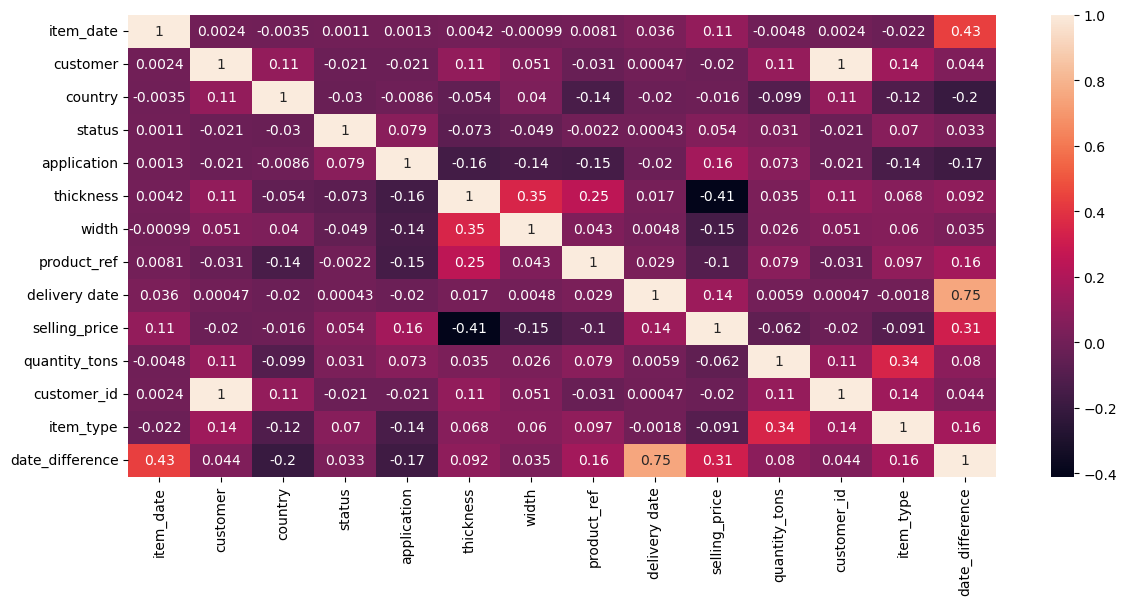

In [48]:
df_heatmap = df4.corr()
plt.figure(figsize=(14,6))
sns.heatmap(df_heatmap, annot=True)

#### selling price and tickness has high correlation

In [49]:
df4.head()

,item_date,customer,country,status,application,thickness,width,product_ref,delivery date,selling_price,quantity_tons,customer_id,item_type,date_difference
0,2021-04-01,30156308.0,28,1,10,2.00,7.313887,1670798778,2021-07-01,6.751101,4.010963,30156308,2,91.0
1,2021-04-01,30202938.0,25,1,41,0.80,7.099202,1668701718,2021-04-01,6.954639,6.645091,30202938,2,0.0
2,2021-04-01,30153963.0,30,1,28,0.38,6.859615,628377,2021-01-01,6.469762,5.958683,30153963,1,-90.0
3,2021-04-01,30349574.0,32,1,59,2.30,7.183871,1668701718,2021-01-01,6.645091,5.315174,30349574,5,-90.0
4,2021-04-01,30211560.0,28,1,10,4.00,7.601402,640665,2021-03-01,6.359574,6.667593,30211560,2,-31.0


In [50]:
df4[df4.date_difference <=10]

,item_date,customer,country,status,application,thickness,width,product_ref,delivery date,selling_price,quantity_tons,customer_id,item_type,date_difference
1,2021-04-01,30202938.0,25,1,41,0.80,7.099202,1668701718,2021-04-01,6.954639,6.645091,30202938,2,0.0
2,2021-04-01,30153963.0,30,1,28,0.38,6.859615,628377,2021-01-01,6.469762,5.958683,30153963,1,-90.0
3,2021-04-01,30349574.0,32,1,59,2.30,7.183871,1668701718,2021-01-01,6.645091,5.315174,30349574,5,-90.0
4,2021-04-01,30211560.0,28,1,10,4.00,7.601402,640665,2021-03-01,6.359574,6.667593,30211560,2,-31.0
5,2021-04-01,30202938.0,25,1,41,1.50,7.143618,1668701718,2021-04-01,6.891626,5.424069,30202938,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,2020-07-02,30200854.0,25,1,41,0.96,7.123673,164141591,2020-07-01,6.401917,4.680278,30200854,2,-1.0
181668,2020-07-02,30200854.0,25,1,41,0.96,7.107425,164141591,2020-07-01,6.383507,4.639572,30200854,2,-1.0
181669,2020-07-02,30200854.0,25,1,41,0.95,7.313887,164141591,2020-07-01,6.380123,5.342813,30200854,2,-1.0
181670,2020-07-02,30200854.0,25,1,41,0.71,7.131699,164141591,2020-07-01,6.429719,1.648659,30200854,2,-1.0


### there are so many date difference are negative so i set a threshold as 15 days

In [51]:
df5=df4[df4.date_difference>15]

In [52]:
df5.shape

(130555, 14)

In [53]:
df5.head()

,item_date,customer,country,status,application,thickness,width,product_ref,delivery date,selling_price,quantity_tons,customer_id,item_type,date_difference
0,2021-04-01,30156308.0,28,1,10,2.00,7.313887,1670798778,2021-07-01,6.751101,4.010963,30156308,2,91.0
8,2021-04-01,30341428.0,38,1,10,0.60,7.151485,1668701376,2021-07-01,7.218177,4.249923,30341428,5,91.0
12,2021-04-01,30165529.0,78,1,10,0.75,7.131699,164141591,2021-07-01,7.002156,3.349904,30165529,2,91.0
13,2021-04-01,30202362.0,27,1,10,0.60,6.918695,628377,2021-07-01,6.881411,3.502550,30202362,5,91.0
14,2021-04-01,30271717.0,28,3,10,0.60,7.131699,611993,2021-07-01,7.138073,2.433613,30271717,2,91.0


In [54]:
df5["order_date"]=pd.to_datetime(df5["item_date"],format="%Y%m%d",errors="coerce").dt.day
df5["order_month"]=pd.to_datetime(df5["item_date"],format="%Y%m%d",errors="coerce").dt.month
df5["order_year"]=pd.to_datetime(df5["item_date"],format="%Y%m%d",errors="coerce").dt.year

In [55]:
df5["delivery_date"]=pd.to_datetime(df5["delivery date"],format="%Y%m%d",errors="coerce").dt.day
df5["delivery_month"]=pd.to_datetime(df5["delivery date"],format="%Y%m%d",errors="coerce").dt.month
df5["delivery_year"]=pd.to_datetime(df5["delivery date"],format="%Y%m%d",errors="coerce").dt.year

In [56]:
df5=df5.drop(["item_date","customer","delivery date"],axis=1)

In [57]:
df5.head(2)

,country,status,application,thickness,width,product_ref,selling_price,quantity_tons,customer_id,item_type,date_difference,order_date,order_month,order_year,delivery_date,delivery_month,delivery_year
0,28,1,10,2.0,7.313887,1670798778,6.751101,4.010963,30156308,2,91.0,1,4,2021,1,7,2021
8,38,1,10,0.6,7.151485,1668701376,7.218177,4.249923,30341428,5,91.0,1,4,2021,1,7,2021


In [58]:
final_df=df5.copy()

In [59]:
final_df.shape

(130555, 17)

In [130]:
final_df.head()

,country,status,application,thickness,width,product_ref,selling_price,quantity_tons,customer_id,item_type,date_difference,order_date,order_month,order_year,delivery_date,delivery_month,delivery_year
0,28,1,10,2.00,7.313887,1670798778,6.751101,4.010963,30156308,2,91.0,1,4,2021,1,7,2021
8,38,1,10,0.60,7.151485,1668701376,7.218177,4.249923,30341428,5,91.0,1,4,2021,1,7,2021
12,78,1,10,0.75,7.131699,164141591,7.002156,3.349904,30165529,2,91.0,1,4,2021,1,7,2021
13,27,1,10,0.60,6.918695,628377,6.881411,3.502550,30202362,5,91.0,1,4,2021,1,7,2021
14,28,3,10,0.60,7.131699,611993,7.138073,2.433613,30271717,2,91.0,1,4,2021,1,7,2021


In [61]:
X=final_df.drop(["selling_price"],axis=1)
y=final_df["selling_price"]

In [129]:
from sklearn.tree import ExtraTreeRegressor
ET_model=ExtraTreeRegressor()
ET_model.fit(X,y)

ExtraTreeRegressor()

In [128]:
ET_model.feature_importances_

array([0.02897224, 0.01278484, 0.04403631, 0.2279571 , 0.01148245,
       0.07551066, 0.01923973, 0.01705506, 0.0147344 , 0.0185072 ,
       0.01839892, 0.02622708, 0.38188423, 0.        , 0.0371906 ,
       0.06601915])

In [131]:
X_reg=final_df.drop(["selling_price","customer_id"],axis=1)
y_reg=final_df["selling_price"]

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_reg,y_reg,test_size=0.2,random_state=42)

In [133]:
final_df.dtypes

country              int32
status               int64
application          int32
thickness          float64
width              float64
product_ref          int64
selling_price      float64
quantity_tons      float64
customer_id          int32
item_type            int64
date_difference    float64
order_date           int32
order_month          int32
order_year           int32
delivery_date        int32
delivery_month       int32
delivery_year        int32
dtype: object

In [134]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
reg=LinearRegression()
reg.fit(X_train_scaled,y_train)
pred=reg.predict(X_test_scaled)
print("score for test data is :",reg.score(X_test_scaled,y_test))
print("score for train data is :",reg.score(X_train_scaled,y_train))
print("MSE : ",mean_squared_error(y_test,pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,pred)))


score for test data is : 0.668462055986214
score for train data is : 0.6676169903806853
MSE :  0.01816702367631235
RMSE :  0.13478510183366837


In [136]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train,y_train)
tree_pred=tree_reg.predict(X_test)
print("score for test is :",tree_reg.score(X_test,y_test))
print("score for train is :",tree_reg.score(X_train,y_train))
print("MSE : ",mean_squared_error(y_test,tree_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,tree_pred)))


score for test is : 0.9269553070517103
score for train is : 0.9994036634531072
MSE :  0.004002572526556319
RMSE :  0.06326588754262694


In [137]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

random_reg=RandomForestRegressor(n_estimators=50,random_state=42)
random_reg.fit(X_train,y_train)
y_pred=random_reg.predict(X_test)
print("score for test is :",random_reg.score(X_test,y_test))
print("score for train is :",random_reg.score(X_train,y_train))
print("MSE : ",mean_squared_error(y_test,pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,pred)))


score for test is : 0.9577215566396299
score for train is : 0.9932614208428454
MSE :  0.01816702367631235
RMSE :  0.13478510183366837


In [ ]:
#from sklearn.model_selection import cross_val_score
#score=cross_val_score(random_reg, X_reg, y_reg, cv=5)
#print("Score :",np.mean(score))#

In [138]:
import pickle

with open("pickle/model.pkl" ,"wb")as f:
  pickle.dump(random_reg,f)

with open("pickle/model.pkl" ,"rb")as f:
  model=pickle.load(f)

In [ ]:
#import pickle
#with open("model.pkl" ,"wb")as f:
  #pickle.dump(random_reg,f)

In [ ]:
#with open("/content/drive/MyDrive/model.pkl" ,"wb")as f:
  #pickle.dump(random_reg,f)


In [76]:
X_reg.iloc[0]

country            2.800000e+01
status             1.000000e+00
application        1.000000e+01
thickness          2.000000e+00
width              7.313887e+00
product_ref        1.670799e+09
quantity_tons      4.010963e+00
customer_id        3.015631e+07
item_type          2.000000e+00
date_difference    9.100000e+01
order_date         1.000000e+00
order_month        4.000000e+00
order_year         2.021000e+03
delivery_date      1.000000e+00
delivery_month     7.000000e+00
delivery_year      2.021000e+03
Name: 0, dtype: float64

In [ ]:
y_reg.iloc[0]

6.75110146893676

In [77]:
prediction=random_reg.predict(X.iloc[0].values.reshape(1,-1))
prediction[0]

6.887957173269652

In [140]:
country=float(28)
status=float(1)
item_type=float(2)
application=float(10)
width=np.log(float(1500.0)+1)
product_ref=float(1670798778)
quantity_tons=np.log(float(43.5)+1)
thickness=float(2.0)
date_difference=float(135)
order_date=float(19)
order_month=float(3)
order_year=float(2021)
delivery_date=float(1)
delivery_month=float(8)
delivery_year=float(2021)

features=np.array([[country, status, application, thickness, width, product_ref,
       quantity_tons, item_type, date_difference,
       order_date, order_month, order_year,delivery_date,
       delivery_month, delivery_year]])
y_pred=model.predict(features)
np.exp(y_pred[0])

858.0518652821229

In [79]:
X_reg.columns

Index(['country', 'status', 'application', 'thickness', 'width', 'product_ref',
       'quantity_tons', 'customer_id', 'item_type', 'date_difference',
       'order_date', 'order_month', 'order_year', 'delivery_date',
       'delivery_month', 'delivery_year'],
      dtype='object')

In [80]:
df1.iloc[10000]

item_date        2021-03-19
customer         30272262.0
country                28.0
status                  Won
item type                 W
application            10.0
thickness               4.0
width                1500.0
product_ref      1670798778
delivery date    2021-08-01
selling_price         850.0
quantity_tons          43.5
Name: 10000, dtype: object

In [81]:
model.feature_importances_

array([0.02460534, 0.00477899, 0.00659197, 0.02801788, 0.01017296,
       0.37308156, 0.01920779, 0.01688185, 0.00316191, 0.01439807,
       0.01315773, 0.3522764 , 0.0534203 , 0.        , 0.05179787,
       0.02844938])

# classification model

In [82]:
X_class=final_df.drop(["status"],axis=1)
y_class=final_df["status"]

In [83]:
from sklearn.model_selection import train_test_split
X_train_class,X_test_class,y_train_class,y_test_class=train_test_split(X_class,y_class,test_size=0.2,random_state=0)

In [84]:
X_class.shape

(130555, 16)

In [85]:
y_class.shape

(130555,)

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
tree_class=DecisionTreeClassifier(random_state=1000,criterion="entropy",max_features=15)
tree_class.fit(X_train_class,y_train_class)
class_pred=tree_class.predict(X_test_class)
print("score for test is :",tree_class.score(X_test_class,class_pred))
print("score for train is :",tree_class.score(X_train_class,y_train_class))
print("accuracy :",accuracy_score(y_test_class,class_pred))
print("confusion matrix :\n",confusion_matrix(y_test_class,class_pred))
print("classification report :\n",classification_report(y_test_class,class_pred))

score for test is : 1.0
score for train is : 1.0
accuracy : 0.9223315843897208
confusion matrix :
 [[ 4872   378    20   114     2    42     0     0]
 [  418 15308    25   268     0   144     2     0]
 [   18    20   682    13     0     2     0     0]
 [   97   240    10  2775     0    22     0     0]
 [    0     0     0     0     0     0     0     0]
 [   50   126     0    16     0   434     0     0]
 [    1     0     0     0     0     0     8     0]
 [    0     0     0     0     0     0     0     4]]
classification report :
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      5428
           1       0.95      0.95      0.95     16165
           3       0.93      0.93      0.93       735
           4       0.87      0.88      0.88      3144
           5       0.00      0.00      0.00         0
           6       0.67      0.69      0.68       626
           7       0.80      0.89      0.84         9
           8       1.00      1.00 

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
random_class=RandomForestClassifier(random_state=42,n_estimators=400,criterion="entropy",max_depth=50)
random_class.fit(X_train_class,y_train_class)
class_pred=random_class.predict(X_test_class)
print("score for test is :",random_class.score(X_test_class,class_pred))
print("score for train is :",random_class.score(X_train_class,y_train_class))
print("accuracy :",accuracy_score(y_test_class,class_pred))
print("confusion matrix :\n",confusion_matrix(y_test_class,class_pred))
print("classification report :\n",classification_report(y_test_class,class_pred))

score for test is : 1.0
score for train is : 1.0
accuracy : 0.9475316916242197
confusion matrix :
 [[ 5134   233     7    42    12     0     0]
 [  292 15651     8   164    50     0     0]
 [   26    16   681    11     0     1     0]
 [   80   209     2  2850     3     0     0]
 [   49   148     1    14   414     0     0]
 [    1     0     0     0     0     8     0]
 [    1     0     0     0     0     0     3]]
classification report :
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      5428
           1       0.96      0.97      0.97     16165
           3       0.97      0.93      0.95       735
           4       0.93      0.91      0.92      3144
           6       0.86      0.66      0.75       626
           7       0.89      0.89      0.89         9
           8       1.00      0.75      0.86         4

    accuracy                           0.95     26111
   macro avg       0.93      0.86      0.89     26111
weighted avg      

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_class=GradientBoostingClassifier(n_estimators=50,learning_rate=0.05,random_state=20)
GBC_class.fit(X_train_class,y_train_class)
GBC_pred=GBC_class.predict(X_test_class)
print("score for test is :",GBC_class.score(X_test_class,GBC_pred))
print("score for train is :",GBC_class.score(X_train_class,y_train_class))
print("accuracy :",accuracy_score(y_test_class,GBC_pred))

score for test is : 1.0
score for train is : 0.6817337520585194
accuracy : 0.685381639921872


In [ ]:
#with open("/content/sample_data/class_model.pkl" ,"wb")as f:
  #pickle.dump(random_class,f)

In [ ]:
#with open("/content/sample_data/class_model.pkl" ,"rb")as f:
  #model1=pickle.load(f)

### random forest and decision tree give high accuracy

In [91]:
with open("pickle/class_model.pkl" ,"wb")as f:
  pickle.dump(random_class,f)

In [ ]:
#with open("/content/drive/MyDrive/class_model.pkl" ,"wb")as f:
#  pickle.dump(random_class,f)

#with open("/content/drive/MyDrive/class_model.pkl" ,"rb")as f:
#  model1=pickle.load(f)

In [143]:
customer_id=float(30197978)
country=float(28)
item_type=float(2)
application=float(10)
width=np.log(float(1000.0)+1)
product_ref=float(1670798778)
quantity_tons=np.log(float(125.1)+1)
thickness=float(2.0)
date_difference=float(135)
order_date=float(31)
order_month=float(3)
order_year=float(2021)
delivery_date=float(1)
delivery_month=float(9)
delivery_year=float(2021)
selling_price=np.log(float(964.0)+1)

features=np.array([[country, application, thickness, width, product_ref,
       selling_price,quantity_tons, customer_id, item_type, date_difference,
       order_date, order_month, order_year,delivery_date,
       delivery_month, delivery_year]])
y_pred=random_class.predict(features)
np.exp(y_pred[0])

1.0

In [ ]:
df1.iloc[1000]

item_date        2021-03-31
customer         30197978.0
country                28.0
status                 Lost
item type                 W
application            10.0
thickness               4.0
width                1000.0
product_ref      1670798778
delivery date    2021-09-01
selling_price         964.0
quantity_tons         125.1
Name: 1000, dtype: object

In [92]:
df.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [94]:
df1.iloc[0]

item_date        2021-04-01
customer         30156308.0
country                28.0
status                  Won
item type                 W
application            10.0
thickness               2.0
width                1500.0
product_ref      1670798778
delivery date    2021-07-01
selling_price         854.0
quantity_tons          54.2
Name: 0, dtype: object

In [110]:
df1.thickness.max()

2500.0

In [116]:
df4.product_ref.min()

611733

In [117]:
df4.product_ref.max()

1721130331

In [118]:
df1.application.min()

2.0

In [119]:
df1.application.max()

99.0

In [141]:
df1.product_ref.unique()

array([1670798778, 1668701718,     628377,     640665,     611993,
       1668701376,  164141591, 1671863738, 1332077137,     640405,
       1693867550, 1665572374, 1282007633, 1668701698,     628117,
       1690738206,     628112,     640400, 1671876026,  164336407,
        164337175, 1668701725, 1665572032,     611728, 1721130331,
       1693867563,     611733, 1690738219, 1722207579,  929423819,
       1665584320, 1665584662, 1665584642], dtype=int64)